In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
!pip install lightgbm 

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 2.8 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
filepath=r"C:\Users\CSIO\Desktop\Diabetic Foot Research\Machine Learning Implementation\dataset_with_4_classes\combined_data\final.csv"
data=pd.read_csv(filepath)
data

,MTK1.T,MTK2.T,MTK3.T,MTK4.T,MTK5.T,D1.T,L.T,C.T,max_temp,min_temp,temp_range,condition
0,0.983221,1.579631,1.926185,2.091407,1.760453,0.619983,1.272439,0.915525,2.091407,0.619983,1.471423,0
1,0.125197,0.094649,0.608958,0.700101,1.500195,0.227996,1.762956,2.435764,2.435764,0.094649,2.341115,0
2,0.335517,0.938675,0.493425,0.343672,1.189942,1.257875,1.669362,1.263756,1.669362,0.335517,1.333844,0
3,0.343761,0.276866,0.537738,0.246287,1.398624,1.630739,0.438513,0.423720,1.630739,0.246287,1.384452,0
4,0.704690,1.595115,1.218438,0.859128,1.165247,0.722619,1.235193,3.400332,3.400332,0.704690,2.695642,1
...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.572060,0.651480,0.323167,2.548236,1.137525,3.652500,0.942357,0.385682,3.652500,0.323167,3.329333,1
74,1.643545,2.232720,2.246896,1.983081,1.971958,1.429466,1.704914,1.288972,2.246896,1.288972,0.957924,0
75,0.381049,1.013439,0.216111,0.816165,1.821659,1.642428,1.033259,0.374977,1.821659,0.216111,1.605548,0
76,0.609831,0.426914,1.071384,1.597074,2.917671,0.594115,3.530871,2.749073,3.530871,0.426914,3.103957,1


In [4]:
from sklearn.model_selection import train_test_split

X=data.drop(columns=['condition'])
y=data['condition']
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [5]:
len(X_train)

39

In [6]:
len(X_test)

39

In [7]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,             
    num_leaves=31,
    random_state=42,
    n_jobs=-1                
)

In [8]:
lgbm.fit(X_train,y_train)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 13, number of negative: 26
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because t

LGBMClassifier(n_jobs=-1, random_state=42)

In [9]:
from sklearn.metrics import classification_report, accuracy_score

y_pred=lgbm.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(f"Accuracy:{accuracy*100:.3f}%")

Accuracy:64.103%


In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 5, 10],          # -1 means no limit
    'min_child_samples': [10, 20, 50]
}

lgbm = LGBMClassifier(random_state=42)

grid = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,             # 3-fold cross-validation
    n_jobs=-1,        # Use all CPUs
    verbose=2
)

grid.fit(X_train, y_train)

print('Best parameters:', grid.best_params_)
print('Best CV accuracy:', grid.best_score_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Info] Number of positive: 13, number of negative: 26
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 39, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

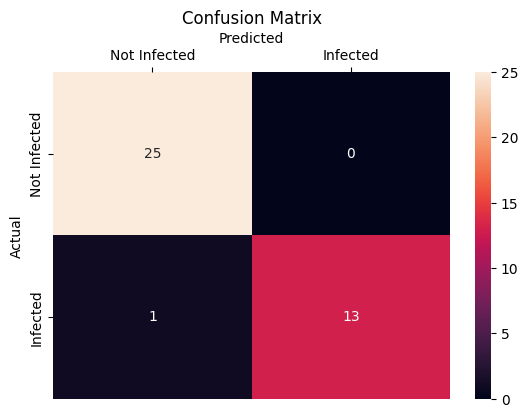

Accuracy: 97.436
Precision: 100.000
Sensitivity (Recall): 96.154
F1-Score: 98.039


In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
actual=y_test
predicted=grid.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected', 'Infected'],
           yticklabels=['Not Infected', 'Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"Accuracy: {accuracy*100:.3f}")
print(f"Precision: {precision*100:.3f}")
print(f"Sensitivity (Recall): {recall*100:.3f}")
print(f"F1-Score: {f1_score*100:.3f}")

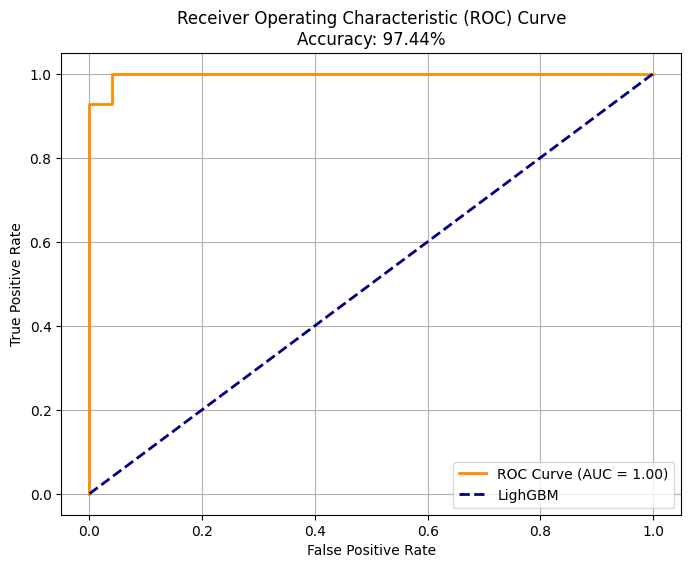

In [29]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities (only for the positive class)
y_prob = grid.predict_proba(X_test)[:, 1]

# Predict labels (for accuracy)
y_pred = grid.predict(X_test)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='LighGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [21]:
import warnings
warnings.filterwarnings("ignore")
values=[[2.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,2.2,0.3,1.9]]
cond=grid.predict(values)
print(cond)

[0]


In [22]:
values=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.1,0.7]]
cond=grid.predict(values)
print(cond)

[0]


In [23]:
values=[[3.1,2.2,0.3,4.4,0.5,0.6,0.7,0.8,4.4,0.3,4.1]]
cond=grid.predict(values)
print(cond)

[1]


In [24]:
values=[[2.0,2.0,2.3,2.4,2.5,2.6,0.7,0.8,2.6,0.7,1.9]]
cond=grid.predict(values)
print(cond)

[0]


In [25]:
values=[[6.1,2.2,0.3,0.4,0.5,0.6,9.7,0.8,6.1,0.3,5.8]]
cond=grid.predict(values)
print(cond)

[1]


In [26]:
values=[[3.5,0.2,2.3,2.4,2.5,1.6,2.7,0.8,3.5,0.2,3.3]]
cond=grid.predict(values)
print(cond)

[1]


In [27]:
#failed 
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond=grid.predict(values)
print(cond)

[0]


In [28]:
import joblib
joblib.dump(grid,'./lightgbm_model.h5')
print("Model saved")

Model saved
